## Bigg Boss Hindi/Kannada/Tamil/Telugu/Malayalam/Marathi/Bangla Data sets and EDA

## https://satya-python.blogspot.com/

## Importing Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Check and import dataset

In [2]:
!cd /kaggle/input; ls -tlr

total 60
-rw-r--r-- 1 root root 58740 Oct 26 02:21 Bigg_Boss_India.csv


In [3]:
bigg_boss = pd.read_csv('/kaggle/input/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 521 rows and 20 columns


## Exploratory Data Analysis (EDA)

In [4]:
bigg_boss.head(5)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,NaN,2.72,NaN,0.0
1,Hindi,1,Anupama Verma,Model,NaN,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,NaN,2.72,NaN,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,NaN,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,NaN,2.72,NaN,0.0
3,Hindi,1,Baba Sehgal,Singer,NaN,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,NaN,2.72,NaN,0.0
4,Hindi,1,Bobby Darling,LGBT,NaN,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,NaN,2.72,NaN,0.0


In [5]:
bigg_boss.tail(10).T

,511,512,513,514,515,516,517,518,519,520
Language,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam,Malayam
Season Number,1,1,1,1,1,1,1,1,1,1
Name,Hima Shankar,Manoj K. Verma,Pearle Maaney,Ranjini Haridas,Sabumon Abdusamad,Shweta Menon,Sreelakshmi Sreekumar,Srinish Aravind,Anjali Ameer,Shiyas Kareem
Profession,Actress,Businessman,Actress,TV Anchor,TV Anchor,Actress,Actress,Soap Actor,Actress,Actor
Gender,Female,Male,Female,Female,Male,Female,Female,Male,Female,Male
Entry Date,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,24-Jun-18,NaN,NaN
Elimination Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,11,NaN,14,9,NaN,5,4,14,NaN,14
Wild Card,No,No,No,No,No,No,No,No,Yes,Yes
Season Length,98,98,98,98,98,98,98,98,98,98


In [6]:
bigg_boss.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Winner
439,Marathi,1,Aastad Kale,Actor,Male,15-Apr-18,NaN,14.0,No,98,18,15-Apr-18,22-Jul-18,Mahesh Manjrekar,0,Colors Marathi,NaN,NaN,NaN,0.0
234,Kannada,1,Nikita Thukral,Actress,Female,24-Mar-13,30-Jun-13,14.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,0,ETV Kannada,NaN,NaN,NaN,0.0
126,Hindi,8,Puneet Issar,Actor,Male,21-Sep-14,03-Jan-15,15.0,No,105,19,21-Sep-14,03-Jan-15,Salman Khan/Farah Khan,0,Colors,NaN,3.77,NaN,0.0
74,Hindi,5,Amar Upadhyay,Actor,Male,NaN,07-Jan-12,14.0,Yes,98,18,02-Oct-11,07-Jan-12,Salman Khan/Sanjay Dutt,0,Colors,7.0,4.19,NaN,0.0
383,Telugu,3,Tamanna Simhadri,LGBT,Transgender,28-Jul-19,11-Aug-19,3.0,Yes,100,17,21-Jul-19,29-Oct-19,Nagarjuna,0,Star Maa,NaN,NaN,NaN,0.0
316,Kannada,6,Anand Malgatti,Commoner,NaN,21-Oct-18,NaN,6.0,No,100,20,21-Oct-18,27-Jan-19,Sudeep,0,Colors Kannada,NaN,NaN,NaN,0.0
136,Hindi,9,Aman Verma,Soap Actor,Male,11-Oct-15,NaN,6.0,No,105,20,11-Oct-15,23-Jan-16,Salman Khan,0,Colors,NaN,2.90,NaN,0.0
185,Hindi,11,Puneesh Sharma,Reality Show Alumni,NaN,01-Oct-17,NaN,15.0,No,106,19,01-Oct-17,14-Jan-18,Salman Khan,0,Colors,NaN,7.64,NaN,0.0
21,Hindi,2,Monica Bedi,Controversial Fame,NaN,17-Aug-08,NaN,13.0,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,0,Colors,NaN,2.89,NaN,0.0
519,Malayam,1,Anjali Ameer,Actress,Female,NaN,NaN,NaN,Yes,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,Asianet,NaN,NaN,NaN,0.0


In [7]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 20 columns):
Language                     521 non-null object
Season Number                521 non-null int64
Name                         519 non-null object
Profession                   507 non-null object
Gender                       303 non-null object
Entry Date                   456 non-null object
Elimination Date             89 non-null object
Elimination Week Number      391 non-null float64
Wild Card                    517 non-null object
Season Length                521 non-null int64
Number of Housemates         521 non-null int64
Season Start Date            521 non-null object
Season End Date              521 non-null object
Host Name                    521 non-null object
Prize Money (INR)            493 non-null object
Broadcasted By               521 non-null object
Number of Evictions Faced    20 non-null float64
Average TRP                  213 non-null float64
Number of re-en

In [8]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 13
Number of unique values in Name - 518
Number of unique values in Profession - 52
Number of unique values in Gender - 3
Number of unique values in Entry Date - 35
Number of unique values in Elimination Date - 49
Number of unique values in Elimination Week Number - 16
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 11
Number of unique values in Number of Housemates - 6
Number of unique values in Season Start Date - 30
Number of unique values in Season End Date - 28
Number of unique values in Host Name - 15
Number of unique values in Prize Money (INR) - 6
Number of unique values in Broadcasted By - 11
Number of unique values in Number of Evictions Faced - 9
Number of unique values in Average TRP - 12
Number of unique values in Number of re-entries - 0
Number of unique values in Winner - 2


## Bigg Boss Hindi has many seasons compared to other Indian languages. So, number of housemates are more in Hindi.

In [10]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi      13
Kannada     6
Tamil       3
Telugu      3
Bengali     2
Marathi     2
Malayam     1
Name: Season Number, dtype: int64


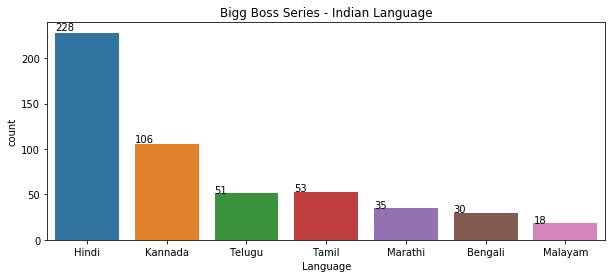

In [11]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## In Bigg Boss India seasons, most of the housemates (86%) entered in first day/week

No     447
Yes     70
Name: Wild Card, dtype: int64 

No     86.0
Yes    14.0
Name: Wild Card, dtype: float64


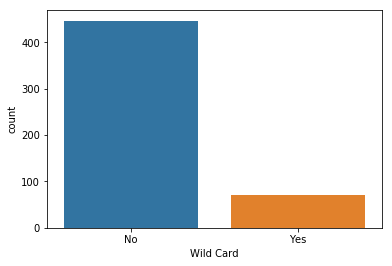

In [12]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss)

## Number of film actress entered into the Bigg Boss houses, are more when compared to other professions 

Actress                  120
Actor                     90
Commoner                  43
Model                     38
Soap Actress              34
Singer                    28
TV Anchor                 24
Soap Actor                23
Reality Show Alumni       14
RJ                         8
Comedian                   7
Sports Person              7
International Star         6
Choreographer              6
Film director              5
Controversial Fame         4
Pageant Winner             3
VJ                         3
News Reader                3
Wrestler                   3
Nurse                      2
Politician                 2
Producer                   2
LGBT                       2
Fashion Designer           2
Stage Actress              2
Film Critic                1
Gym Trainer                1
Theatre artist             1
Politically Acclaimed      1
Journalist                 1
Numerologist               1
Swamiji                    1
Air Hostess                1
Social Media S

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

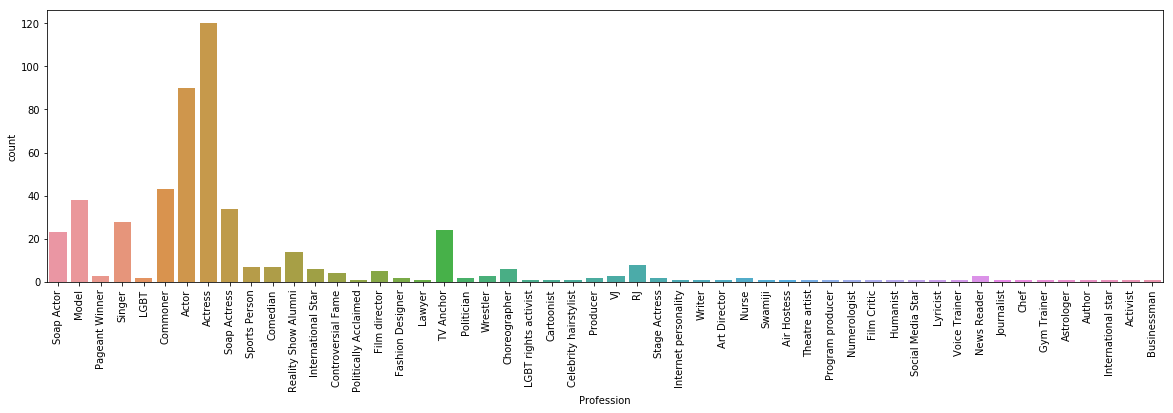

In [13]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(20,5))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

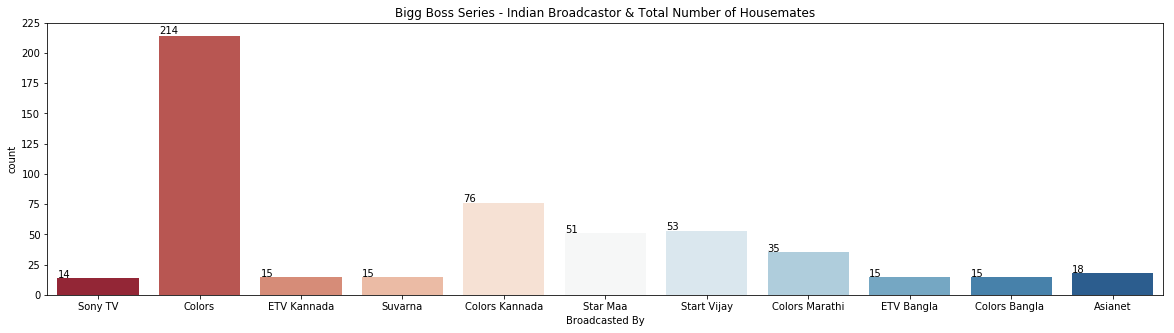

In [14]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## Salman Khan hosted most number of seasons (in Bigg Boss Hindi), Sudeep is next in the list

In [15]:
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan                8
Sudeep                     6
Kamal Haasan               3
Mahesh Manjrekar           2
Amitabh Bachchan           1
Arshad Warsi               1
Jeet                       1
Jr. NTR                    1
Mithun Chakraborthy        1
Mohanlal                   1
Nagarjuna                  1
Nani                       1
Salman Khan/Farah Khan     1
Salman Khan/Sanjay Dutt    1
Shilpa Shetty              1
Name: Season Number, dtype: int64

## In all Bigg Boss languages, and in all seasons, Female contestants are more

In [16]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts())
## Gender data is NOT up-to-date ##

Female         173
Male           129
Transgender      1
Name: Gender, dtype: int64


In [17]:
# Maximum TRP of Bigg Boss Hindi/India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 7.64 

Language  Season Number
   Hindi             11


## https://satya-data.blogspot.com/2018/01/bigg-boss-data-set-bigg-boss.html

In [18]:
# All Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Winner
9,Hindi,1,Rahul Roy,Actor,Male,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,"1,00,00,000",Sony TV,NaN,2.72,NaN,1.0
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,NaN,17-Aug-08,NaN,NaN,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,"1,00,00,000",Colors,NaN,2.89,NaN,1.0
41,Hindi,3,Vindu Dara Singh,Actor,Male,04-Oct-09,NaN,NaN,No,84,15,04-Oct-09,26-Dec-09,Amitabh Bachchan,"1,00,00,000",Colors,NaN,2.83,NaN,1.0
56,Hindi,4,Shweta Tiwari,Soap Actress,Female,03-Oct-10,NaN,NaN,No,96,16,03-Oct-10,08-Jan-11,Salman Khan,"1,00,00,000",Colors,NaN,4.95,NaN,1.0
61,Hindi,5,Juhi Parmar,Soap Actress,Female,02-Oct-11,NaN,NaN,No,98,18,02-Oct-11,07-Jan-12,Salman Khan/Sanjay Dutt,"1,00,00,000",Colors,4.0,4.19,NaN,1.0
91,Hindi,6,Urvashi Dholakia,Actress,Female,07-Oct-12,NaN,NaN,No,97,19,07-Oct-12,12-Jan-13,Salman Khan,"50,00,000",Colors,NaN,3.81,NaN,1.0
101,Hindi,7,Gauhar Khan,Actress,Female,15-Sep-13,NaN,NaN,No,105,20,15-Sep-13,28-Dec-13,Salman Khan,"50,00,000",Colors,NaN,4.40,NaN,1.0
120,Hindi,8,Gautam Gulati,Actor,Male,21-Sep-14,NaN,NaN,No,105,19,21-Sep-14,03-Jan-15,Salman Khan/Farah Khan,"50,00,000",Colors,NaN,3.77,NaN,1.0
143,Hindi,9,Prince Narula,Reality Show Alumni,Male,11-Oct-15,NaN,NaN,No,105,20,11-Oct-15,23-Jan-16,Salman Khan,"50,00,000",Colors,NaN,2.90,NaN,1.0
163,Hindi,10,Manveer Gurjar,Commoner,NaN,16-Oct-16,NaN,NaN,No,105,18,16-Oct-16,28-Jan-17,Salman Khan,"50,00,000",Colors,NaN,3.54,NaN,1.0


In [19]:
# Profession of Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actress                6
Actor                  6
Soap Actress           3
Reality Show Alumni    3
Commoner               2
Singer                 2
TV Anchor              2
Soap Actor             1
Model                  1
Film director          1
Name: Profession, dtype: int64

In [20]:
# Gender of Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts()
## Gender data is NOT up-to-date ##

Male      9
Female    9
Name: Gender, dtype: int64

## No wild card entry housemate won the Bigg Boss competition.

In [21]:
# Entry type of the Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    27
Name: Wild Card, dtype: int64

## Preparing Data for ML modelling

In [22]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                       0
Season Number                  0
Name                           2
Profession                    14
Gender                       218
Entry Date                    65
Elimination Date             432
Elimination Week Number      130
Wild Card                      4
Season Length                  0
Number of Housemates           0
Season Start Date              0
Season End Date                0
Host Name                      0
Prize Money (INR)             28
Broadcasted By                 0
Number of Evictions Faced    501
Average TRP                  308
Number of re-entries         521
Winner                        28
dtype: int64

In [23]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [24]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

In [25]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 20 columns):
Language                     519 non-null object
Season Number                519 non-null int64
Name                         519 non-null object
Profession                   507 non-null object
Gender                       303 non-null object
Entry Date                   454 non-null object
Elimination Date             89 non-null object
Elimination Week Number      391 non-null float64
Wild Card                    517 non-null object
Season Length                519 non-null int64
Number of Housemates         519 non-null int64
Season Start Date            519 non-null object
Season End Date              519 non-null object
Host Name                    519 non-null object
Prize Money (INR)            493 non-null object
Broadcasted By               519 non-null object
Number of Evictions Faced    519 non-null float64
Average TRP                  519 non-null float64
Number of re-e

In [26]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [27]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0
1,Hindi,1,Anupama Verma,Model,NaN,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,NaN,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0
3,Hindi,1,Baba Sehgal,Singer,NaN,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0
4,Hindi,1,Bobby Darling,LGBT,NaN,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,1.0,2.72,0.0,0.0


In [28]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Winner
514,Malayam,1,Shweta Menon,Actress,Female,2018-06-24,NaT,5.0,No,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,1.0,4.11831,0.0,0.0
515,Malayam,1,Sreelakshmi Sreekumar,Actress,Female,2018-06-24,NaT,4.0,No,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,1.0,4.11831,0.0,0.0
516,Malayam,1,Srinish Aravind,Soap Actor,Male,2018-06-24,NaT,14.0,No,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,1.0,4.11831,0.0,0.0
517,Malayam,1,Anjali Ameer,Actress,Female,NaT,NaT,NaN,Yes,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,1.0,4.11831,0.0,0.0
518,Malayam,1,Shiyas Kareem,Actor,Male,NaT,NaT,14.0,Yes,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,1.0,4.11831,0.0,0.0


In [29]:
bigg_boss.loc[(bigg_boss['Language']=='Telugu')]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Number of Evictions Faced,Average TRP,Number of re-entries,Winner
332,Telugu,1,Aadarsh,Actor,Male,2017-07-16,2017-09-24,10.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
333,Telugu,1,Archana,Actress,Female,2017-07-16,2017-09-24,10.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
334,Telugu,1,Dhanraj,Comedian,Male,2017-07-16,2017-08-26,6.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
335,Telugu,1,Hari Teja,Actress,Female,2017-07-16,2017-09-24,10.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
336,Telugu,1,Jyothi,Actress,Female,2017-07-16,2017-07-23,1.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
337,Telugu,1,Kalpana Raghavendar,Singer,Female,2017-07-16,2017-08-13,4.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
338,Telugu,1,Kathi Karthika,TV Anchor,Female,2017-07-16,2017-08-27,6.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
339,Telugu,1,Madhu Priya,Singer,Female,2017-07-16,2017-07-30,2.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
340,Telugu,1,Mahesh Kathi,Film Critic,Male,2017-07-16,2017-08-12,4.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0
341,Telugu,1,Mumaith Khan,Actress,Female,2017-07-16,2017-09-03,7.0,No,70,16,2017-07-16,2017-09-24,Jr. NTR,0,Star Maa,1.0,4.11831,0.0,0.0


In [ ]:
# Changing Data manually for Mahesh & Vithika
bigg_boss.iloc[372,19] = 0
bigg_boss.iloc[377,19] = 0
bigg_boss.iloc[380,19] = 0
bigg_boss.iloc[366,18] = 1

In [ ]:
train = bigg_boss.loc[(bigg_boss['Language']!='Telugu') & (bigg_boss['Winner'].notnull()), :]
train

In [ ]:
test = bigg_boss.loc[(bigg_boss['Language']=='Telugu'), :]
#test = bigg_boss.loc[(bigg_boss['Language']=='Telugu') & (bigg_boss['Winner'].isnull()), :]
test

In [ ]:
Participant_Name = test[['Name','Winner']]
#Participant_Name = test.loc[test['Winner'].isnull()]['Name']
Participant_Name.reset_index(drop=True,inplace=True)
Participant_Name

In [ ]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number"], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number","Winner"], axis=1, inplace=True)

In [ ]:
str_cols= train.loc[:, train.dtypes=='object'].columns.tolist()
str_cols

In [ ]:
# One Hot Encoding
train = pd.get_dummies(train, columns=str_cols, drop_first=True)
test = pd.get_dummies(test, columns=str_cols, drop_first=True)

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train2 = train.drop(['Winner'], axis=1)
target = train["Winner"]

In [ ]:
# spread of target variable
print(train['Winner'].value_counts(normalize=True)*100)

In [ ]:
train2 = train2.loc[:, test.columns]
print(train2.shape)
print(test.shape)

In [ ]:
train2.drop(["Profession_Film Critic","Profession_Humanist","Profession_Social Media Star","Gender_Transgender","Host Name_Nagarjuna","Host Name_Nani"], axis=1, inplace=True)
test.drop(["Profession_Film Critic","Profession_Humanist","Profession_Social Media Star","Gender_Transgender","Host Name_Nagarjuna","Host Name_Nani"], axis=1, inplace=True)

In [ ]:
train2.isnull().sum()

In [ ]:
train2.sample(8)

In [ ]:
target.values

In [ ]:
test.info()

In [ ]:
train2.info()

## Machine Learning Modelling

In [ ]:
logi = LogisticRegression(random_state=2019).fit(train2, target)
logi

In [ ]:
pred_val_logi = logi.predict_proba(test)[:, 1]
pred_val_logi

In [ ]:
winner = pd.concat([Participant_Name, pd.DataFrame(pred_val_logi, columns=['Predicted_Winner'])],axis=1)
#winner = pd.DataFrame(data = {"Participant_Name":Participant_Name, "Predicted_Winner":pred_val_logi}).reset_index(drop=True)
winner = winner.loc[winner['Winner'].isnull()].reset_index(drop=True)
winner

In [ ]:
# Predicted Winner for Bigg Boss Telugu Season 3, as per LogisticRegression
winner.iloc[winner.Predicted_Winner.argmax()]['Name']

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=2019).fit(train2, target)
rf

In [ ]:
pred_val_rf = rf.predict_proba(test)[:,1]
pred_val_rf

In [ ]:
# winner = pd.DataFrame(data = {"Participant_Name":Participant_Name, "Predicted_Winner":pred_val_rf}).reset_index(drop=True)

winner = pd.concat([Participant_Name, pd.DataFrame(pred_val_rf, columns=['Predicted_Winner'])],axis=1)
winner = winner.loc[winner['Winner'].isnull()].reset_index(drop=True)
winner

In [ ]:
# Predicted Winner for Bigg Boss Telugu Season 3, as per RandomForest
winner.iloc[np.argwhere(winner.Predicted_Winner == np.amax(winner.Predicted_Winner)).flatten().tolist()]['Name']